### 大纲

* 熵基础信息，联合熵，条件熵，互信息
* 相对熵
* 交叉熵
* 信息增益
* 最大熵

### 熵的基础信息

* 信息量：信息的度量，表示：$ h(x) = -log_2p(x)$  时间发生的概率成反比 （事件发上的概率越大，信息量越小）
* 熵： 信息量的期望 ， 表示 :$H(X)   = - \sum p(x_i)log p(x_i) $
    * x 服从均匀分布 ${0,1}^n$  的熵为 $ H(x) = -\sum_{i=1}^{2n} {1 \over 2n} log {1 \over 2n} = n $

* 联合熵：$ H(X,Y) = -\sum\sum P(x_i,y_j)log_2p(x_i,y_j)  $
    * 性质： $H(X,Y) = H(X) + H(X|Y)$

* 条件熵：$H(X|Y) = \sum p(x_i)H(Y|x_i)=\sum\sum p(x_i,y_j)log{p(x_i) \over p(x_i,y_j)}$

* 互信息： $I(X,Y) = -\sum\sum p(x_i,y_j) log{p(x_i,y_j) \over p(x_i)p(y_j)}$ 刻画特征的非线性相关性 使用 特征选择，降维
    * 线性相关： ${ cov(x,y) \over  \sqrt {var(x)} \sqrt{ var(y)} }$


### 相对熵（KL散度）

* 刻画内容：两个分布的差异（刻画分布的差异方式还有：Wase(p,q),MMD,kernel Hibert densit sistance(p||q))

* 公式: $ D(p||q) = \sum p(x_i)log{p(x_i) \over q(x_i)} $

* 特点：
    * 不对称 $ D(p||q) = D(q||p)  $
    *  $ D(p||q) > = 0 $  可以有琴声不等式可得

### 交叉熵 （cross entropy） cnn 常用的目标函数 （也是度量的两个分布的差异）

* 交叉熵CH： $ CH(p,q) = -\sum p(x_i)log q(x_i) = -\sum p(x_i)log p(x_i) + \sum p(x_i)log p(x_i) - \sum p(x_i)log q(x_i)  = H(p) + D(p||q)$

### 信息增益

* 信息增益 = 分裂前的熵 - 分裂后的熵

### 最大熵

* 最大熵 ：给定事件/数据 $ T = \{(x_1,y_1),,,,,,,,(x_n,y_n)\} $ ,确定 $ p(x_i,y_i)$

* 最大熵的原则： 承认已知，没有任何偏见的

* cnn 常用目标：最大化条件熵 $ H(y|x) = -\sum\sum p(y,x)log p(y|x) $  最终目的是求$p(y|x)$

* 上面目标的推到：

    * 定义特征函数 $f(x,y) = \begin{cases} 1, & x=x_0,y=y_0 \\ 0, &  \end{cases}$
    
    * 约束 $\sum p(y_i|x) = 1$ , $E(f(x,y)) = -\sum\sum p(x_i,y_i)f(x_i,y_i) = {i \over n} \sum \sum f(x,y)$
    
    * 根据目标函数和约束构造拉格朗日：$ L=\sum\sum p(y_j|x_i)p(x_i)log{1 \over p(y_j|x_i)} + \sum^m\lambda_i \sum\sum f(x_i,y_j)\{ p(y_i|x_i)p(x_i) - p(x_i,y_i) \} + \lambda_0\{ \sum p(y_j|x_i) -1 \}  $
    
    * 对上面的公式求到可得： $ { \partial L \over \partial p(y_j|x_i)  }  =  p(x)( log{1 \over p(y_j|x_i)} - 1 ) +  \sum \lambda_i p(x)f(x_i,y_j) + \lambda_0 = 0$
    
    * $ p(y|x) = {1 \over z_\lambda(x) }e ^{\sum\lambda_if(x,y)} $

### EM(Expectation Maximization 期望最大化)

* 交替迭代求解（固定其他参数，求取一个未知解，然后固定在选取一个未知再优化）

* 显变量：变量可以观测

* 隐变量：变量不可观测

* 全概率公式：$ p(Y) = \sum p(z)p(y|z)  = \sum p(y,z)$

* 贝叶斯公式： $ p(y|z) = { p(y,z) \over p(z)} $

* 极大似然：如果，$X={x_1,......,x_n}$ 独立同分布 ，则 $p(Y|X) = \prod p(Y|x_i) $

    * 由于连乘受噪音影响大，所以两边同时log操作：$ln p(Y|X) = \sum ln p(y|x_i) $

* 带有隐变量的似然函数：$L(\theta) = \prod P_\theta(y_j) =  \prod  \sum P_\theta(y_j|z)P_\theta(z)$

    * 也是log操作，可得: $ ln L(\theta) =   \sum ln \sum P_\theta(y_j|z)P_\theta(z) $  在对数中有加和项很难求解，只能求金近似解
    
    * 使用迭代方式求解，（$l(\theta) = lnL(\theta) $）满足 $ l(\theta + 1) > l(\theta)$
        * 第$\theta$ 次已经求出来了，要求下次$\theta$(未知) ,及：$ l(\theta) - l(\theta_n) = \sum ln\sum P_\theta(y_j|z)P_\theta(z)  -  \sum ln\sum P_{\theta_n}(y_j|z)P_{\theta_n}(z)  =  \sum ( ln\sum P_\theta(y_j|z)P_\theta(z)  -  ln\sum P_{\theta_n}(y_j|z)P_{\theta_n}(z) )$
        
        * 提取第一项进行转化（琴声不等式，ln是凹函数 ）$ ln \sum P_\theta(y|z) P_\theta(z) =  ln\sum P_{\theta_n}(z|y) { P_\theta(y|z) P_\theta(z) \over P_{\theta_n}(z|y) }  >= \sum P_\theta(z|y) ln { P_\theta(y|z) P_\theta(z) \over P_\theta(z|y) } $
        * 第二项可以求出来（因为$\theta_n$已经知道，且$1= \sum P_\theta(z|y)$） ： 第二项可以表示成：
            * $ ln P_{\theta_n}  (y) = lnP_{\theta_n}(y) \sum P_{\theta_n}(z|y) = \sum P_{\theta_n}(z|y)lnP_{\theta_n}(y) $
            
        * 第一项和第二项合并可得：$  l(\theta) - l(\theta_n) >= \sum P_{\theta_n}(z|y) ln { P_\theta(y|z) P_\theta(z) \over P_{\theta_n}(z|y) }  - \sum P_{\theta_n}(z|y)lnP_{\theta_n}(y)  = \sum P_{\theta_n}(z|y) (  ln { P_\theta(y|z) P_\theta(z) \over P_{\theta_n}(z|y) P_{\theta_n}(y) }  ) $
        
        * 有上面公式可得 $  l(\theta) >= l(\theta_n) + \sum P_{\theta_n}(z|y) (  ln { P_\theta(y|z) P_\theta(z) \over P_{\theta_n}(z|y) P_{\theta_n}(y) }  ) $ (等号右边就是下边界函数)
        
        * 然后对下边界函数求偏导数，算出未知项，带入下边界，然后循环迭代（z:隐变量，有：显变量）
 
* EM算法总结：
    * 1:初始化参数
    
    * 2.E步：
    
    * 3.M步：
    
    * 4. 直到 $ l(\theta) - l(\theta_n)  < 制定值 $ 停止循环，否则 重复，2，3步

### EM算法 图形解释
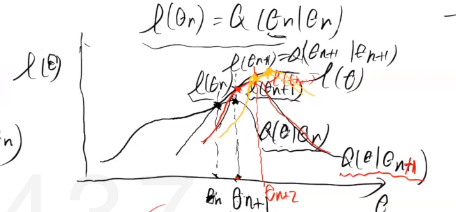

###  从 K-means到 高斯 总结 EM算法

* 1.随机k个个中心点

* 2E步：计算每个点到这些中心点距离最短，然后聚类

* 3M步：然后找聚类内部的中心点 min $ J = \sum^k \sum^n || x - \mu ||^2 = \sum^k \sum^n  \alpha_{ik} ||  x_i - \mu_k ||^2 $

* 4重复2，3步 直到不再变化

### 高斯混合模型（Gaussian Mixture Models）

* 高斯混合模型： 一个高斯拟合不了数据，使用多个高斯去加权拟合

* $ p(x_i | \mu_k) = {1 \over \sqrt{2\pi}\delta_k }   e ^{- {1 \over {2\delta^2}}(x_i - \mu_k)^2} $  
    * 解释：$x_i$  在k 高斯分布的概率
    
* 先验概率： $ p(\mu_k) = {1 \over k} = \pi_k$
    
* 后验概率 $ P(k|x_i)  = { \pi_i N(\mu_i,\delta_i) \over  \sum^k \pi_kN(\mu_k,\delta_k) } = \gamma_{jk}$

* $ mu_k = { \sum \gamma{jk}\over \sum \gamma{ik}} $

* $ \delta_k = { \sum\gamma_{ik} \over \sum \gamma_{ik}} (x - \mu_ik)^2$